In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score

# Paths
data_dir = "dcn/"

# Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
dataset = ImageFolder(root=data_dir, transform=transform)

# Split Dataset
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(dataset.classes))  # Update the final layer
model = model.to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



/home/vamsi/miniconda3/envs/sr3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/vamsi/miniconda3/envs/sr3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)

    train_accuracy = train_correct / train_total

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = val_correct / val_total

    # Print Metrics
    print(f"Epoch [{epoch + 1}/{epochs}]")
    print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss / len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

# Save the Model
torch.save(model.state_dict(), "classifier_model.pth")


Epoch [1/10]
Train Loss: 0.9059, Train Accuracy: 0.6771
Val Loss: 1.1352, Val Accuracy: 0.6102
Epoch [2/10]
Train Loss: 0.6209, Train Accuracy: 0.7855
Val Loss: 0.6723, Val Accuracy: 0.7703
Epoch [3/10]
Train Loss: 0.5075, Train Accuracy: 0.8225
Val Loss: 0.6105, Val Accuracy: 0.7875
Epoch [4/10]
Train Loss: 0.4307, Train Accuracy: 0.8461
Val Loss: 0.7665, Val Accuracy: 0.7556
Epoch [5/10]
Train Loss: 0.3699, Train Accuracy: 0.8700
Val Loss: 0.4993, Val Accuracy: 0.8331
Epoch [6/10]
Train Loss: 0.3088, Train Accuracy: 0.8900
Val Loss: 0.7136, Val Accuracy: 0.7762
Epoch [7/10]
Train Loss: 0.2653, Train Accuracy: 0.9065
Val Loss: 0.5699, Val Accuracy: 0.8092
Epoch [8/10]
Train Loss: 0.1992, Train Accuracy: 0.9297
Val Loss: 1.8941, Val Accuracy: 0.6781
Epoch [9/10]
Train Loss: 0.1693, Train Accuracy: 0.9409
Val Loss: 0.7414, Val Accuracy: 0.8030
Epoch [10/10]
Train Loss: 0.1382, Train Accuracy: 0.9533
Val Loss: 0.6833, Val Accuracy: 0.8306


In [18]:
# Training Loop
epochs = 10
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_total += labels.size(0)

    train_accuracy = train_correct / train_total

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_accuracy = val_correct / val_total

    # Print Metrics
    print(f"Epoch [{epoch + 1}/{epochs}]")
    print(f"Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss / len(val_loader):.4f}, Val Accuracy: {val_accuracy:.4f}")

# Save the Model
torch.save(model.state_dict(), "classifier_model3.pth")


Epoch [1/10]
Train Loss: 0.9077, Train Accuracy: 0.6725
Val Loss: 0.9808, Val Accuracy: 0.6536
Epoch [2/10]
Train Loss: 0.6280, Train Accuracy: 0.7777
Val Loss: 0.6443, Val Accuracy: 0.7807
Epoch [3/10]
Train Loss: 0.5259, Train Accuracy: 0.8167
Val Loss: 0.8198, Val Accuracy: 0.7207
Epoch [4/10]
Train Loss: 0.4507, Train Accuracy: 0.8378
Val Loss: 0.5543, Val Accuracy: 0.8078
Epoch [5/10]
Train Loss: 0.3803, Train Accuracy: 0.8639
Val Loss: 0.5579, Val Accuracy: 0.8083
Epoch [6/10]
Train Loss: 0.3323, Train Accuracy: 0.8802
Val Loss: 0.5919, Val Accuracy: 0.8075
Epoch [7/10]
Train Loss: 0.2645, Train Accuracy: 0.9056
Val Loss: 0.5821, Val Accuracy: 0.8174
Epoch [8/10]
Train Loss: 0.2249, Train Accuracy: 0.9211
Val Loss: 0.6423, Val Accuracy: 0.8081
Epoch [9/10]
Train Loss: 0.1718, Train Accuracy: 0.9386
Val Loss: 0.6310, Val Accuracy: 0.8230
Epoch [10/10]
Train Loss: 0.1517, Train Accuracy: 0.9476
Val Loss: 0.7237, Val Accuracy: 0.8261


In [1]:
from PIL import Image
import torch
import torchvision.transforms as transforms

# Load the trained model
model.load_state_dict(torch.load("classifier_model3.pth"))
model.to(device)
model.eval()

# Function to test with a single image
def test_single_image(image_path, model, device):
    # Preprocess the image
    transform = transforms.Compose([
        transforms.Resize((224, 224)),  # Adjust to your model's input size
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Adjust to your training normalization
    ])
    
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension
    
    # Inference
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted = torch.max(output, 1)
    
    return predicted.item()

# Test the model with an image
image_path = "dcn/6/image_9988.png"  # Replace with your image path
predicted_class = test_single_image(image_path, model, device)

print(f"Predicted Class: {predicted_class}")



NameError: name 'model' is not defined

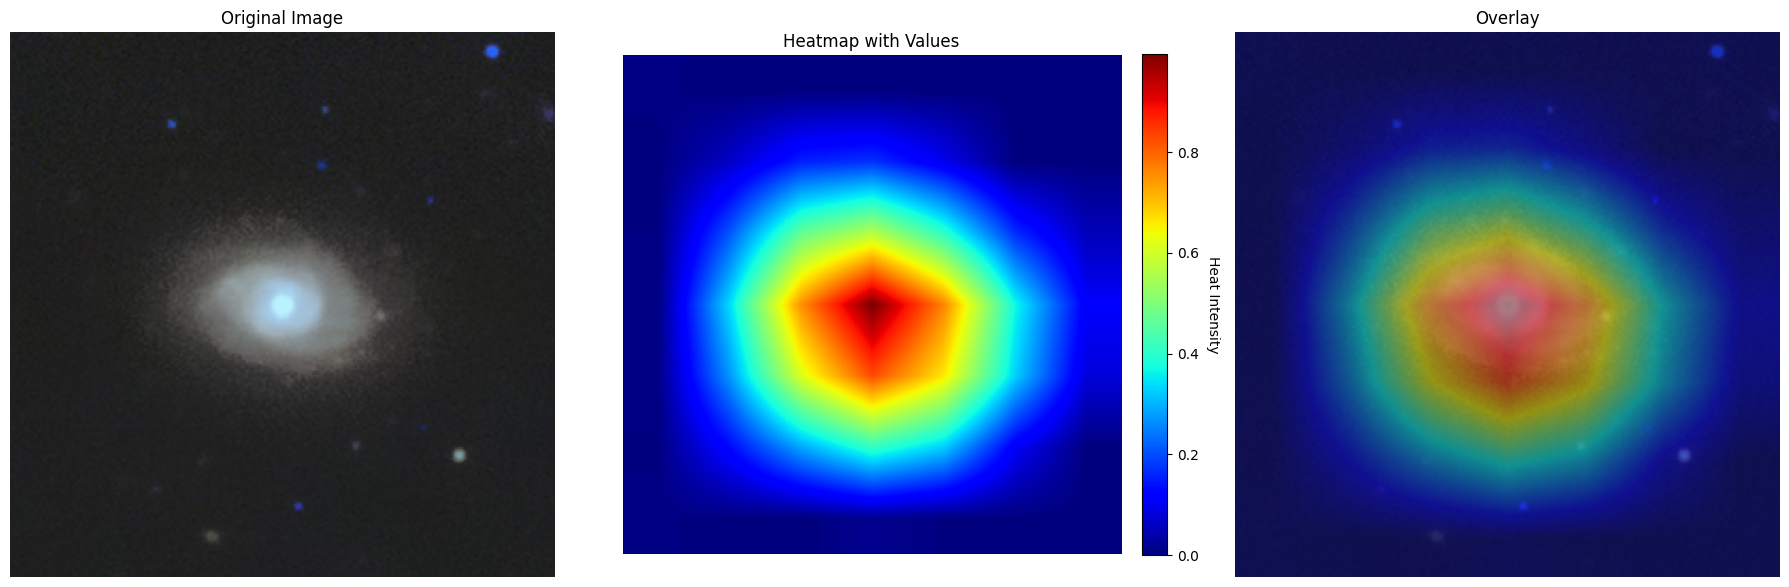

In [72]:
import matplotlib.pyplot as plt
import cv2
import torch
import torch.nn.functional as F
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import numpy as np
import cv2
from PIL import Image

# Function to preprocess the image
def preprocess_image(image_path, input_size):
    transform = Compose([
        Resize((input_size, input_size)),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert("RGB")
    tensor = transform(image).unsqueeze(0)
    return tensor, np.array(image)

# Grad-CAM implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Hook to capture gradients
        def save_grads(module, grad_in, grad_out):
            self.gradients = grad_out[0]

        # Hook to capture activations
        def save_activations(module, input, output):
            self.activations = output

        target_layer.register_forward_hook(save_activations)
        target_layer.register_backward_hook(save_grads)

    def generate_heatmap(self, class_idx):
        # Compute gradients and activations
        grads = self.gradients.cpu().data.numpy()
        activations = self.activations.cpu().data.numpy()

        # Global average pool the gradients
        weights = np.mean(grads, axis=(2, 3))
        weighted_activations = weights[:, :, None, None] * activations
        heatmap = np.sum(weighted_activations, axis=1).squeeze()

        # Normalize the heatmap
        heatmap = np.maximum(heatmap, 0)
        heatmap = heatmap / np.max(heatmap)
        return heatmap

# Function to overlay the heatmap on the original image
def overlay_heatmap(heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), colormap)
    overlay = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)
    return overlay

# Load model and image

model.eval()



def show_heatmap_with_values(heatmap, image, alpha=0.5):
    heatmap_resized = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)
    
    # Overlay heatmap on the image
    overlay = cv2.addWeighted(image, 1 - alpha, heatmap_colored, alpha, 0)

    # Plot using Matplotlib
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax[0].imshow(image)
    ax[0].set_title("Original Image")
    ax[0].axis("off")

    ax[1].imshow(heatmap_resized, cmap='jet')
    ax[1].set_title("Heatmap with Values")
    ax[1].axis("off")
    # Add a colorbar to show heat values
    heatmap_img = ax[1].imshow(heatmap_resized, cmap='jet')
    cbar = fig.colorbar(heatmap_img, ax=ax[1], fraction=0.046, pad=0.04)
    cbar.set_label("Heat Intensity", rotation=270, labelpad=15)

    ax[2].imshow(overlay)
    ax[2].set_title("Overlay")
    ax[2].axis("off")

    plt.tight_layout()
    plt.show()



input_size = 224  # Adjust to your model's input size
input_tensor, original_image = preprocess_image(image_path, input_size)

# Grad-CAM setup
target_layer = model.layer4  # Replace with the target layer (e.g., last conv layer)
grad_cam = GradCAM(model, target_layer)

input_tensor = input_tensor.to(device)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
output = model(input_tensor)
class_idx = torch.argmax(output).item()

model.zero_grad()
output[0, class_idx].backward()

heatmap = grad_cam.generate_heatmap(class_idx)

show_heatmap_with_values(heatmap, original_image)


In [73]:
# Load both saved models
model1 = models.resnet18(pretrained=False)
model1.fc = nn.Linear(model1.fc.in_features, len(dataset.classes))
model1.load_state_dict(torch.load("classifier_model3.pth"))
model1.to(device)
model1.eval()

model2 = models.resnet18(pretrained=False)
model2.fc = nn.Linear(model2.fc.in_features, len(dataset.classes))
model2.load_state_dict(torch.load("classifier_model2.pth"))
model2.to(device)
model2.eval()

# Function to test all images in the validation set
def test_validation_set(val_loader, model1, model2, device):
    model1_incorrect = []
    model2_incorrect = []
    
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        
        with torch.no_grad():
            # Predictions from both models
            output1 = model1(images)
            _, preds1 = torch.max(output1, 1)
            
            output2 = model2(images)
            _, preds2 = torch.max(output2, 1)
        
        # Compare predictions with ground truth
        for i in range(len(labels)):
            if preds1[i] != labels[i]:
                model1_incorrect.append((i, preds1[i].item(), labels[i].item()))
            if preds2[i] != labels[i]:
                model2_incorrect.append((i, preds2[i].item(), labels[i].item()))
    
    return model1_incorrect, model2_incorrect

# Test and get incorrect predictions
model1_incorrect, model2_incorrect = test_validation_set(val_loader, model1, model2, device)


/tmp/ipykernel_3977893/736817245.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load("classifier_model3.pth"))
/tmp/ipykernel_3977893/73681

In [74]:
# Function to test validation set and report accuracy
def test_and_report_accuracy(val_loader, model1, model2, device):
    correct1, total1 = 0, 0
    correct2, total2 = 0, 0
    
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        
        with torch.no_grad():
            # Predictions from both models
            output1 = model1(images)
            _, preds1 = torch.max(output1, 1)
            
            output2 = model2(images)
            _, preds2 = torch.max(output2, 1)
        
        # Update correct and total counts
        correct1 += (preds1 == labels).sum().item()
        total1 += labels.size(0)
        
        correct2 += (preds2 == labels).sum().item()
        total2 += labels.size(0)
    
    # Calculate accuracies
    accuracy1 = 100 * correct1 / total1
    accuracy2 = 100 * correct2 / total2
    
    return accuracy1, accuracy2

# Compute accuracies
accuracy1, accuracy2 = test_and_report_accuracy(val_loader, model1, model2, device)

# Report accuracies
print(f"Model denoised Accuracy: {accuracy1:.2f}%")
print(f"Model non denoise Accuracy: {accuracy2:.2f}%")


Model denoised Accuracy: 94.05%
Model non denoise Accuracy: 90.67%
